Data visualization - Matplotlib Excercises - ex.5 - Adam Trentowski, 162602

In [121]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('D:/Projekty/DataVisualization/lab_05/files/iris.csv')

# Lines, bars and markers
## Horizontal bar chart

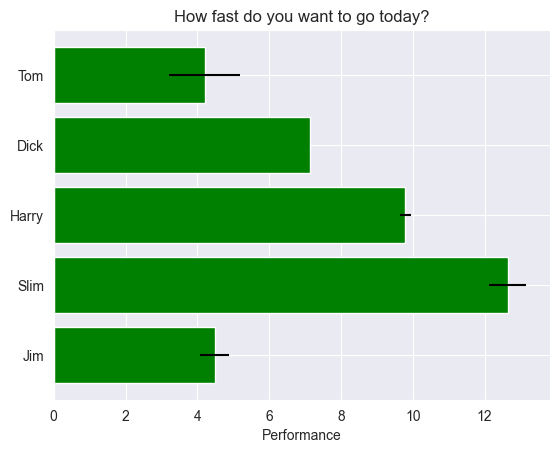

In [4]:
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

### Changed

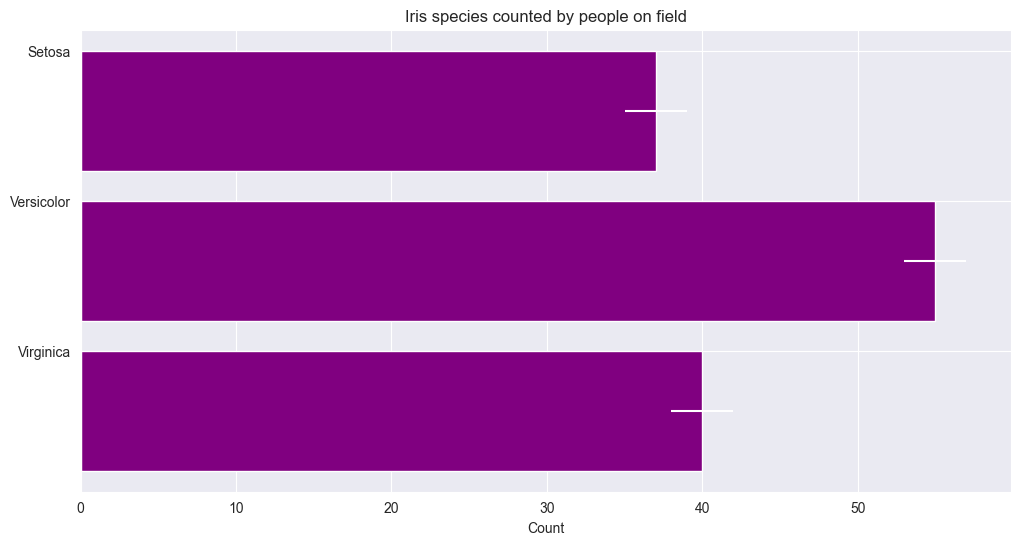

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

species_count = dataset['Species'].value_counts()

species = species_count.index
counts = [37, 55, 40]
y_pos = np.arange(len(species))

ax.barh(y_pos, counts, xerr=2, align='edge', color='purple', ecolor='white')

ax.set_yticks(y_pos)
ax.set_yticklabels(species)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Iris species counted by people on field')

plt.show()

## Fill plot

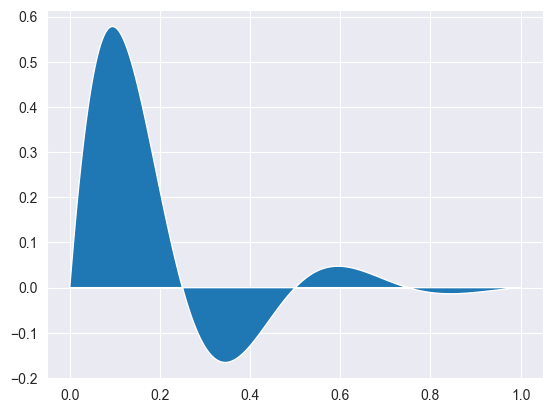

In [6]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

### Changed

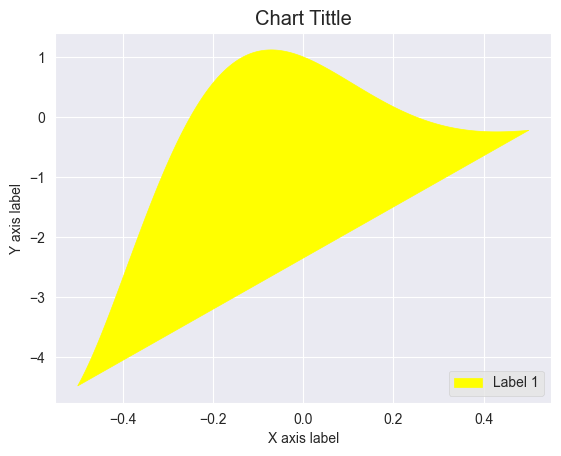

In [7]:
x = np.linspace(-0.5, 0.5, 500)
y = np.cos(-2 * np.pi * x) * np.exp(-3 * x)

fig, ax = plt.subplots()
plt.style.use('ggplot')

ax.fill(x, y, zorder=5, color='yellow')
ax.grid(True, zorder=10)

ax.set_xlabel('X axis label')
ax.set_ylabel('Y axis label')

ax.set_title('Chart Tittle')
ax.legend(['Label 1'], loc=4)
plt.show()

# Subplots, axes and figures
## Aligning Labels

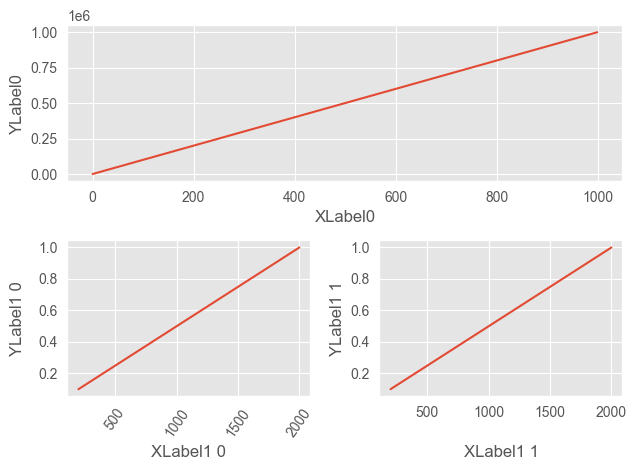

In [8]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        ax.tick_params(axis='x', rotation=55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()

### Changed

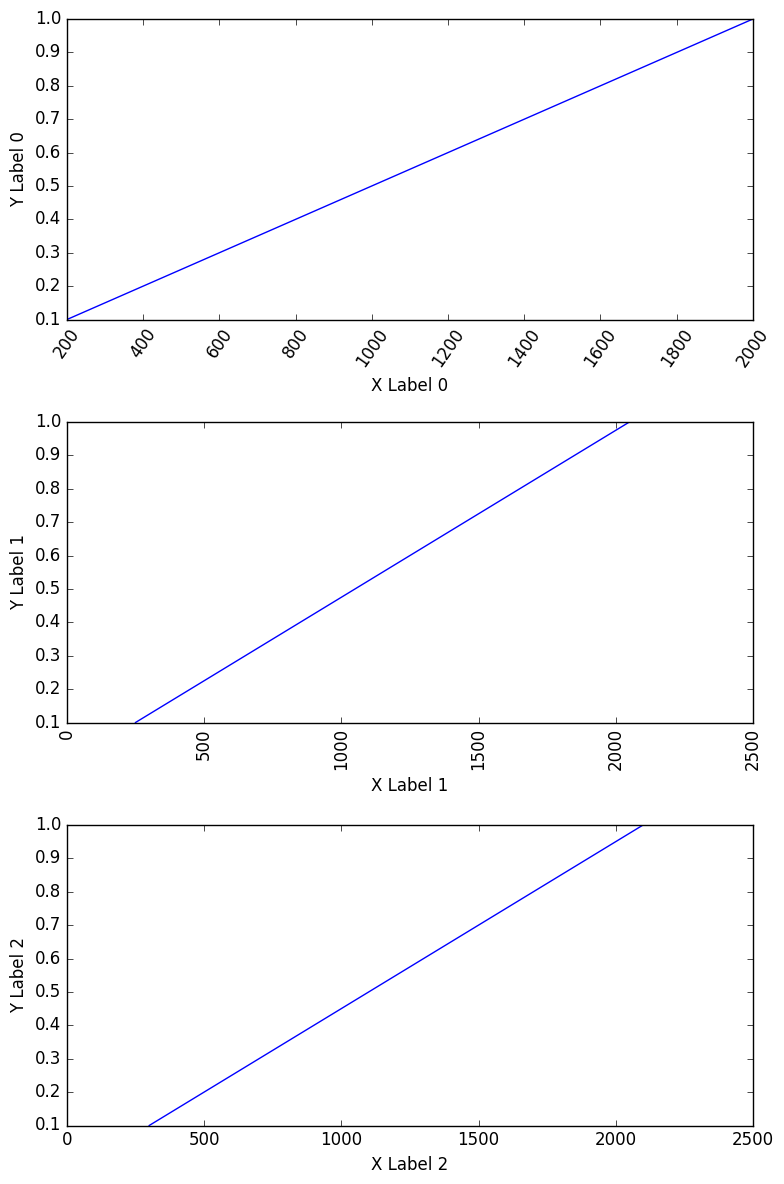

In [9]:
fig = plt.figure(tight_layout=True, figsize=(8, 12))
gs = gridspec.GridSpec(3, 1)
plt.style.use('classic')

for i in range(3):
    ax = fig.add_subplot(gs[i, :])
    ax.plot(np.arange(1., 0., -0.1) * 2000. + 50 * i, np.arange(1., 0., -0.1), color='blue')
    ax.set_ylabel(f'Y Label {i}')
    ax.set_xlabel(f'X Label {i}')
    if i == 0:
        ax.tick_params(axis='x', rotation=55)
    if i == 1:
        ax.tick_params(axis='x', rotation=90)
    if i == 2:
        ax.tick_params(axis='x', rotation=0)
fig.align_labels()

plt.show()

## Broken Axis

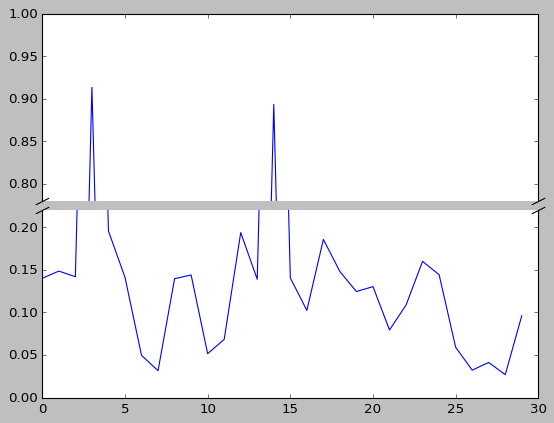

In [10]:
np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

### Changed

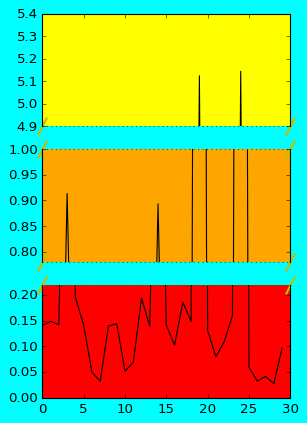

In [47]:
np.random.seed(19680801)

pts = np.random.rand(30)*.2
pts[[3, 14]] += .8
pts[[19, 24]] += 5

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(4, 6))
fig.subplots_adjust(hspace=0.2)

fig.set_facecolor('cyan')
ax1.set_facecolor('yellow')
ax2.set_facecolor('orange')
ax3.set_facecolor('red')

ax1.plot(pts, color='black')
ax2.plot(pts, color='black')
ax3.plot(pts, color='black')

ax1.set_ylim(4.9, 5.4)
ax2.set_ylim(.78, 1.)
ax3.set_ylim(0, .22)

ax1.spines.bottom.set_visible(False)

ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)

ax3.spines.top.set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.tick_params(bottom=False, top=False)
ax3.xaxis.tick_bottom()

d = 2
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=16,
              linestyle="dotted", color='g', mec='y', mew=2, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)

plt.show()

# Statistics
## Box plots with custom fill colors

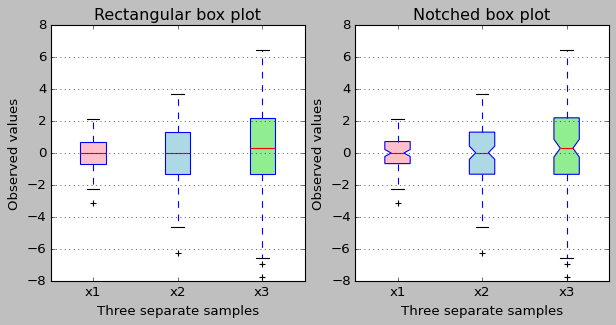

In [48]:
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

### Changed

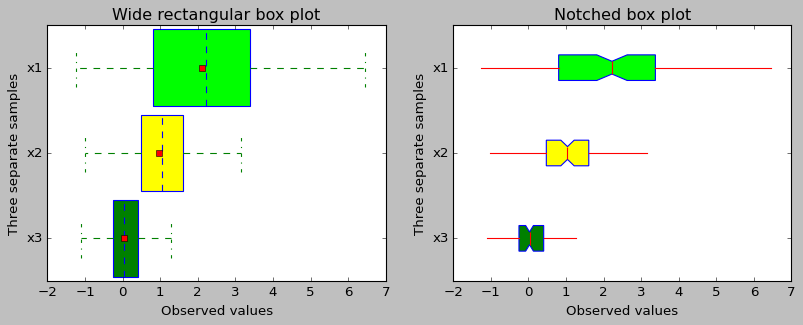

In [90]:
np.random.seed(19612301)
all_data = [np.random.normal(mean, std, size=100) for mean, std in zip([0, 1, 2], [0.5, 1, 1.5])]
labels = ['x3', 'x2', 'x1']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

bplot1 = ax1.boxplot(all_data,
                     vert=False,
                     patch_artist=True,
                     labels=labels,
                     widths=0.9,
                     showmeans=True)
ax1.set_title('Wide rectangular box plot')

bplot2 = ax2.boxplot(all_data,
                     notch=True,
                     vert=False,
                     patch_artist=True,
                     labels=labels,
                     showcaps=False)
ax2.set_title('Notched box plot')

colors = ['green', 'yellow', 'lime']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.setp(bplot1['caps'], linestyle='-.', color='green')
plt.setp(bplot1['whiskers'], linestyle='--', color='green')
plt.setp(bplot1['medians'], linestyle='--', color='blue')

plt.setp(bplot2['whiskers'], linestyle='-', color='red')
plt.setp(bplot2['medians'], linestyle='-', color='red')

for ax in [ax1, ax2]:
    ax.yaxis.grid(False)
    ax.set_xlabel('Observed values')
    ax.set_ylabel('Three separate samples')

plt.show()

## Demo of histogram

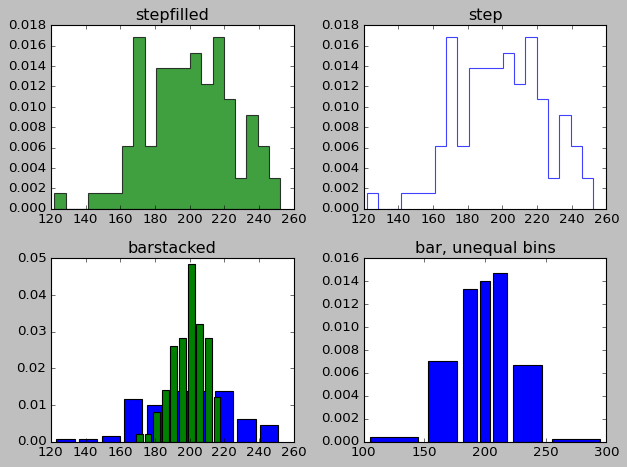

In [91]:
np.random.seed(19680801)

mu_x = 200
sigma_x = 25
x = np.random.normal(mu_x, sigma_x, size=100)

mu_w = 200
sigma_w = 10
w = np.random.normal(mu_w, sigma_w, size=100)

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].hist(x, 20, density=True, histtype='stepfilled', facecolor='g',
               alpha=0.75)
axs[0, 0].set_title('stepfilled')

axs[0, 1].hist(x, 20, density=True, histtype='step', facecolor='g',
               alpha=0.75)
axs[0, 1].set_title('step')

axs[1, 0].hist(x, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].hist(w, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].set_title('barstacked')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
axs[1, 1].hist(x, bins, density=True, histtype='bar', rwidth=0.8)
axs[1, 1].set_title('bar, unequal bins')

fig.tight_layout()
plt.show()

### Changed

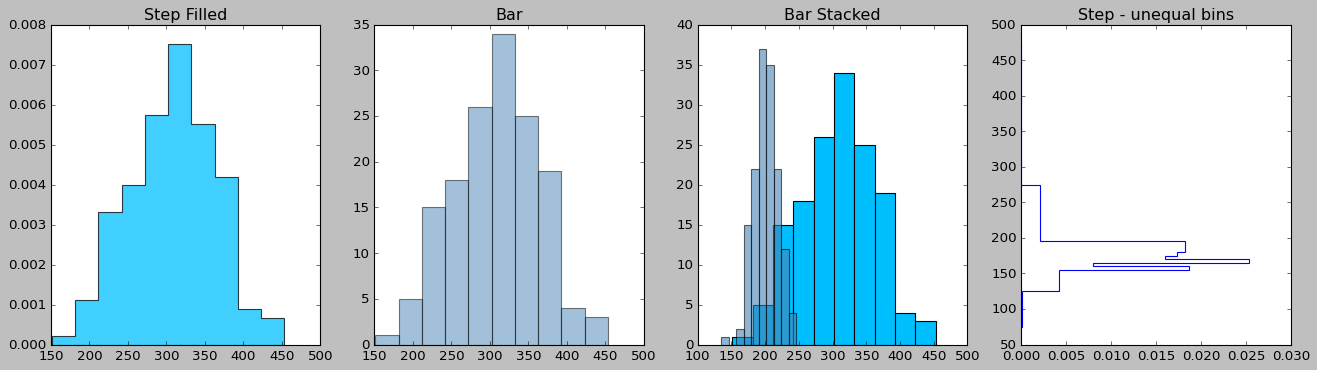

In [116]:
np.random.seed(19133101)

mu_x = 300
sigma_x = 55
x = np.random.normal(mu_x, sigma_x, size=150)

sigma_w = 19
w = np.random.normal(mu_w, sigma_w, size=150)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

axs[0].hist(x, 10, density=True, histtype='stepfilled', facecolor='deepskyblue', alpha=0.75)
axs[0].set_title('Step Filled')

axs[1].hist(x, 10, density=False, histtype='bar', facecolor='steelblue', alpha=0.5)
axs[1].set_title('Bar')

axs[2].hist(x, density=False, histtype='barstacked', rwidth=1, facecolor='deepskyblue')
axs[2].hist(w, density=False, histtype='barstacked', rwidth=1, alpha=0.6, facecolor='steelblue')
axs[2].set_title('Bar Stacked')

bins = [100, 150, 180, 185, 190, 195, 200, 205, 220, 300, 400, 500]
axs[3].hist(w, bins, density=True, histtype='step', rwidth=0.5, facecolor='aqua', orientation='horizontal')
axs[3].set_title('Step - unequal bins')

plt.show()

# Heatmap

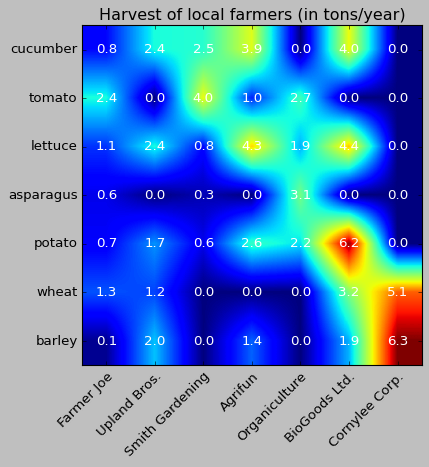

In [120]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

### Changed

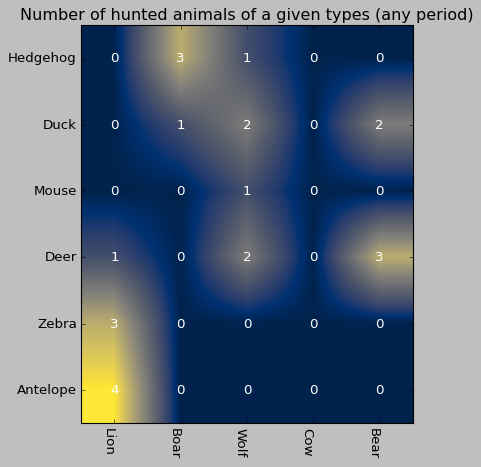

In [141]:
types = ["Hedgehog", "Duck", "Mouse", "Deer", "Zebra", "Antelope"]
hunters = ["Lion", "Boar", "Wolf", "Cow", "Bear"]

hunts = np.array([
    [0, 3, 1, 0, 0],
    [0, 1, 2, 0, 2],
    [0, 0, 1, 0, 0],
    [1, 0, 2, 0, 3],
    [3, 0, 0, 0, 0],
    [4, 0, 0, 0, 0]
])


fig, ax = plt.subplots()
im = ax.imshow(hunts, cmap='cividis', vmin=0, vmax=4)

ax.set_xticks(np.arange(len(hunters)), labels=hunters)
ax.set_yticks(np.arange(len(types)), labels=types)

plt.setp(ax.get_xticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

for i in range(len(types)):
    for j in range(len(hunters)):
        text = ax.text(j, i, hunts[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Number of hunted animals of a given types (any period)")
fig.tight_layout()
plt.show()

# Pie Chart

([<matplotlib.patches.Wedge at 0x2094a4d9010>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Frogs'),
  Text(-0.33991877217145816, 1.046162142464278, 'Hogs'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Dogs'),
  Text(1.0461621822461364, -0.3399186497354948, 'Logs')])

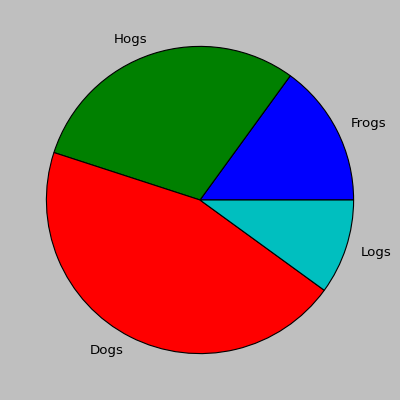

In [142]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

### Changed

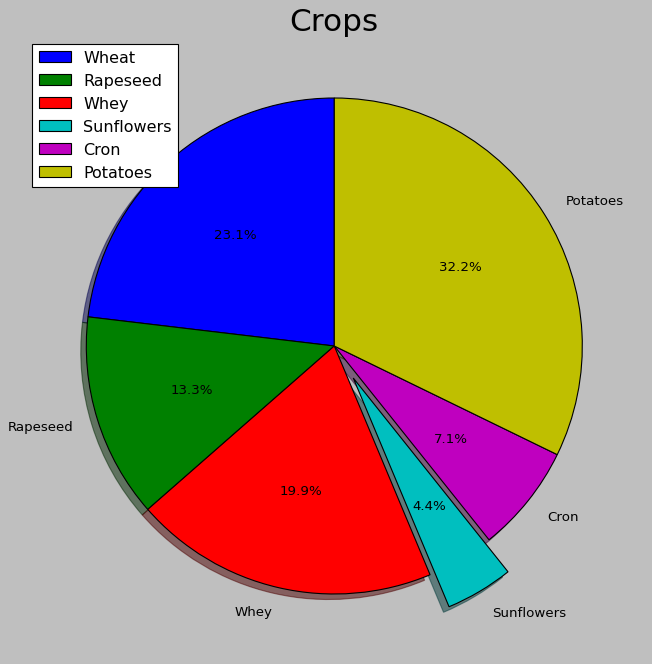

In [151]:
labels = 'Wheat', 'Rapeseed', 'Whey', 'Sunflowers', 'Cron', 'Potatoes'
sizes = [52.4, 30.2, 45, 10, 16, 73]

explode = (0, 0, 0, 0.15, 0, 0, )

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Crops', fontsize=28)
plt.legend(loc='best')
plt.show()